## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Colab Content Table:**


1.   Importing the required libraries
2.   Fetch the dataset from the given format
3.   Understanding Dataset by doing some Data Exploration Operations
4.   Data Cleaning and Store it in proper format (remove/replace null values,   drop dulicate rows, change in required datatypes)
5.   Some important observations on data.
6.   Exploratory Data Analysis
7.   Findout some Co-relations in dataset 



In [42]:
#Importing Libraries like: Numpy, Pandas, Datetime, Matplotlib
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Importing/Fetching datasets from CSV format
playstore_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Capstone Projects /Capstone Project - Exploratory Data Analysis (EDA)/Play Store Data.csv')
user_review_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Capstone Projects /Capstone Project - Exploratory Data Analysis (EDA)/User Reviews.csv')

In [45]:
#Understanding Dataset by doing some Data Exploration Operations
playstore_data.shape,user_review_data.shape

((10841, 13), (64295, 5))

In [46]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [47]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [49]:
Rating_Mode = playstore_data['Rating'].mode().values[0]
Type_Mode = playstore_data['Type'].mode().values[0]
Content_Rating_Mode = playstore_data['Content Rating'].mode().values[0]
Android_Ver_Mode = playstore_data['Android Ver'].mode().values[0]

playstore_data[playstore_data['Rating'].isna()] = Rating_Mode
playstore_data[playstore_data['Type'].isna()] = Type_Mode
playstore_data[playstore_data['Content Rating'].isna()] = Content_Rating_Mode
playstore_data[playstore_data['Android Ver'].isna()] = Android_Ver_Mode

playstore_data['Current Ver'].fillna('Not Available',inplace=True)

In [50]:
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Here we have to change the respective Datatypes for the columns like: 

*   Rating (to Float)
*   Review (to int)
*   Size in Kilobytes (to int)
*   Installs (in int)
*   Price (in Integers)
*   Last Updated (in Datetime)

In [33]:
playstore_data.drop([4453],axis=0,inplace=True)

In [52]:
Data_to_drop = playstore_data[playstore_data['App'] == playstore_data['Rating']]
playstore_data.drop(Data_to_drop.index[:],axis=0,inplace=True)

In [53]:
#Changing the columns in their respective datatypes with proper format and Remove 4453 the default row
try:
  playstore_data.rename({'Price':'Price (in $)'},inplace=True,axis=1)

  playstore_data['Reviews']=playstore_data['Reviews'].replace('4.1 and up',0).replace('Everyone',0).astype(int)

  playstore_data['Rating'] = playstore_data['Rating'].replace('4.1 and up',playstore_data['Rating'].mean()).replace('Everyone',playstore_data['Rating'].mean()).astype(float)

  playstore_data['Installs']=playstore_data['Installs'].apply(lambda x : int(x[0:(len(x)-1)].replace(',','')))

  playstore_data['Price (in $)'] = playstore_data['Price (in $)'].replace('4.1 and up',0).replace('Everyone',0).apply(lambda x: float(x.replace('$','')))

  playstore_data['Last Update Year'] = pd.DatetimeIndex(pd.to_datetime(playstore_data['Last Updated'].apply(lambda x : x[-4:]),format='%Y')).year
  
except:
  print('Float Value Problem')

In [55]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [56]:
user_review_data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [57]:
user_review_data.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [58]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [59]:
user_review_data.shape

(37427, 5)

# Some Queries on which data need to be analysed, Those are:-
Q1: List all different Categories and find the best application in Each Category in terms of installs  and also plot he bar graph for max installs in each category?

Q2: Pie Chart for number of applications(Category-wise) available on Playstore.

Q3: Correlation Graph among: Rating , Review, Install, Size, Price

Q4: Corr Graph Between Sentiment Polarity and Sentiment Subjectivity for All the Positive Sentiment Applications.

Q5: Find the Number of reviews in Every Category and create Bar for that.

Q6: Find all the listed “Google” products and also provide which has most downloads (Graph).

Q7: Which genre of Games are mostly played?

Q8: In Which year most of the applications got updated?

Q9: Applications Operated On Different Android Versions ?


# Q1: List all different Categories and find the best application in Each Category in terms of reviews ?

In [60]:
playstore_data.shape

(9364, 14)

In [61]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9364 non-null   object 
 1   Category          9364 non-null   object 
 2   Rating            9364 non-null   float64
 3   Reviews           9364 non-null   int64  
 4   Size              9364 non-null   object 
 5   Installs          9364 non-null   int64  
 6   Type              9364 non-null   object 
 7   Price (in $)      9364 non-null   float64
 8   Content Rating    9364 non-null   object 
 9   Genres            9364 non-null   object 
 10  Last Updated      9364 non-null   object 
 11  Current Ver       9364 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Last Update Year  9364 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


In [100]:
Every_Catergory_Best_App_Installation_Basis = playstore_data.groupby(['Category'],as_index=False)['Installs'].idxmax()
max_install_catagory_index = pd.Series(Every_Catergory_Best_App_Installation_Basis['Installs'])
playstore_data.loc[max_install_catagory_index,['Category','App','Installs']]

,Category,App,Installs
3,ART_AND_DESIGN,Sketch - Draw & Paint,50000000
72,AUTO_AND_VEHICLES,"Android Auto - Maps, Media, Messaging & Voice",10000000
117,BEAUTY,Beauty Camera - Selfie Camera,10000000
152,BOOKS_AND_REFERENCE,Google Play Books,1000000000
194,BUSINESS,OfficeSuite : Free Office + PDF Editor,100000000
297,COMICS,LINE WEBTOON - Free Comics,10000000
335,COMMUNICATION,Messenger – Text and Video Chat for Free,1000000000
482,DATING,Zoosk Dating App: Meet Singles,10000000
699,EDUCATION,Duolingo: Learn Languages Free,100000000
865,ENTERTAINMENT,Google Play Games,1000000000


In [117]:
Every_Category_Mean_Installs = playstore_data.groupby(['Category'],as_index=True).agg({'Installs':"mean"}).rename(columns ={'Installs':'Installs in Million'})
final_df_for_plot = Every_Category_Mean_Installs['Installs in Million'].apply(lambda x: x/1000000)
final_df_for_plot

Category
ART_AND_DESIGN          2.003760
AUTO_AND_VEHICLES       0.727805
BEAUTY                  0.640862
BOOKS_AND_REFERENCE    10.793773
BUSINESS                3.306165
COMICS                  0.966140
COMMUNICATION          99.534273
DATING                  1.355360
EDUCATION               5.621626
ENTERTAINMENT          19.256107
EVENTS                  0.354431
FAMILY                  5.871609
FINANCE                 2.713970
FOOD_AND_DRINK          2.511722
GAME                   31.983466
HEALTH_AND_FITNESS      5.330156
HOUSE_AND_HOME          2.218184
LIBRARIES_AND_DEMO      0.955123
LIFESTYLE               1.711978
MAPS_AND_NAVIGATION     5.840867
MEDICAL                 0.152016
NEWS_AND_MAGAZINES     32.172578
PARENTING               0.622322
PERSONALIZATION         7.453019
PHOTOGRAPHY            31.824111
PRODUCTIVITY           40.387664
SHOPPING               13.646351
SOCIAL                 54.323712
SPORTS                  5.489440
TOOLS                  15.600442
T

Text(0, 0.5, 'Install in Millions')

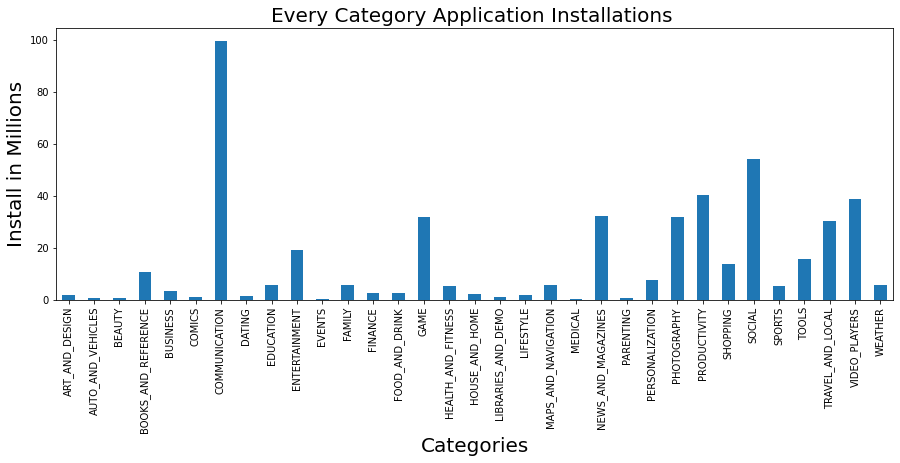

In [128]:
Category_Install_Bar = final_df_for_plot.plot.bar(figsize = (15,5),fontsize = 10)

# Set the title
Category_Install_Bar.set_title("Every Category Application Installations ", fontsize = 20)

# Set x and y-labels
Category_Install_Bar.set_xlabel("Categories", fontsize = 20)
Category_Install_Bar.set_ylabel("Install in Millions", fontsize = 20)

# Q2: Pie Chart for number of applications(Category-wise) available on Playstore.

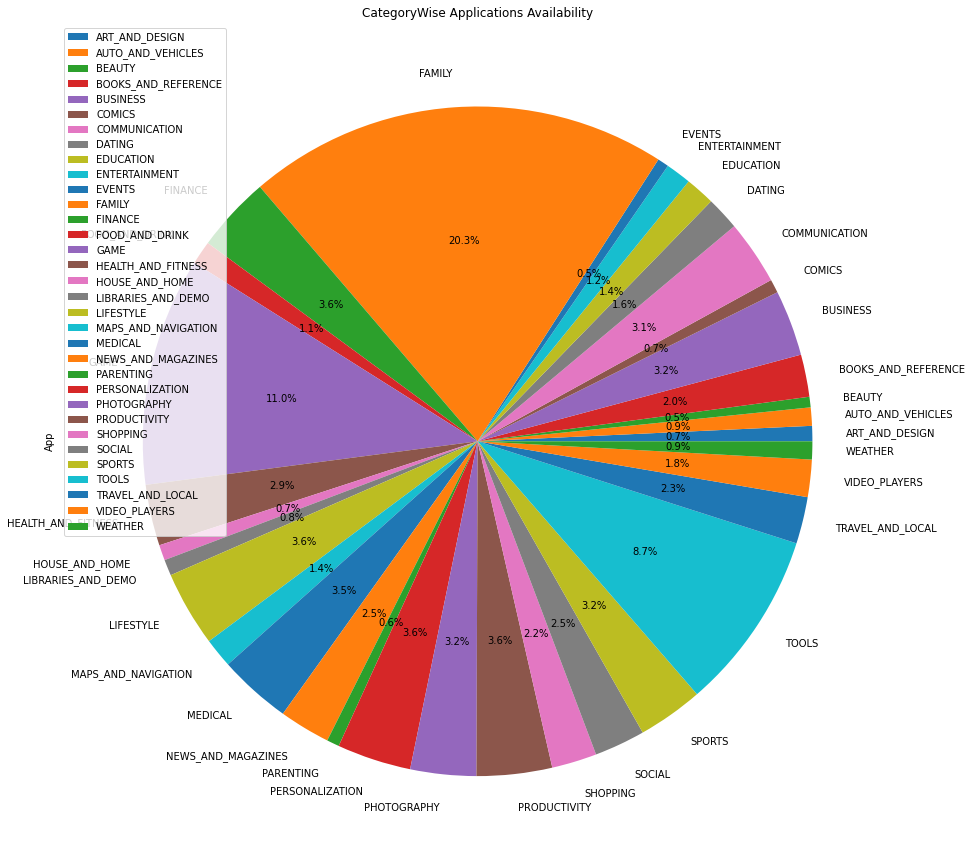

In [216]:
#Finding values need to plot a pie-chart
Pie_Chart_Data = playstore_data.groupby(['Category'],as_index=False)['App'].nunique()
Pie_Chart_Data.set_index('Category', inplace=True)
Pie_Chart_Data_Values = Pie_Chart_Data['App'].tolist()
Pie_Chart_Data.plot.pie(y='App',title="CategoryWise Applications Availability",autopct='%1.1f%%',figsize =(15, 16))